<type 'list'>
<type 'list'>
<type 'int'>
3
(64,)
0.631
71.53136684807257
(array([[0.02273663],
       [0.00183443],
       [0.2756418 ],
       [0.2756418 ],
       [0.2756418 ],
       [0.2756418 ],
       [0.2756418 ],
       [0.2756418 ],
       [0.2756418 ],
       [0.2756418 ]]), array([[1.99034773],
       [1.9999332 ],
       [1.44892176],
       [1.44892176],
       [1.44892176],
       [1.44892176],
       [1.44892176],
       [1.44892176],
       [1.44892176],
       [1.44892176]]))


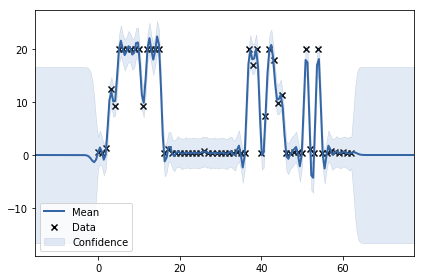

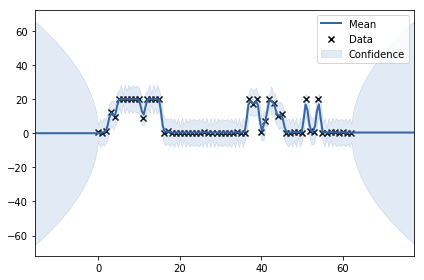

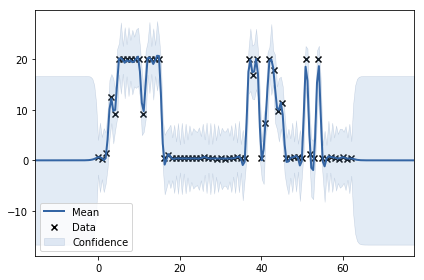

In [62]:
#import plotly.plotly as py
#import plotly.graph_objs as go
import numpy as np
import scipy
import matplotlib
import pylab as pb
import GPy
#pylab
pb.ion()
n,c,s = [],[],[]
with open('time-slice_vs_response-time.csv') as f:
    for line in f:
        m = line.split('\n')
        n.append(m)
n = n[1:]
np.asarray(n)
x = 0
print type(s)
#s = np.asarray(s)
print type(s)
#while(x<len(n)):
#    print n[x][0]
#    x = x+1
z,d = 0,0
'''while(z<len(n)):
    c.append(n[d][0][z])
    z = z+2
    d = d+1'''
#c.append(n[2][0].split(',')[1])
while(d<len(n)):
    s.append(int(n[d][0].split(',')[0]))
    c.append(float(n[d][0].split(',')[1]))
    d = d + 1
print type(s[3])
s = np.asarray(s)
print s[3]
print s.shape
print c[0]
Y = []
rows,columns = 1,63
Y = [[0 for l in range(rows)] for k in range(columns)]
Y = np.asarray(Y)
Y = Y.astype(np.float)
#print X
while(z < columns):
    Y[z][0]=c[z]
    z=z+1
X = []
rows,columns = 1,63
X = [[0 for l in range(rows)] for k in range(columns)]
X = np.asarray(X)
X = X.astype(np.float)
#X[23][0]=c[0]
z = 0
while(z < columns):
    X[z][0]=s[z]
    z=z+1
print np.var(Y)
    #print X
#print Y
#print dir(GPy.kern.RBF)

k = GPy.kern.RBF(input_dim=1, variance=np.var(Y), lengthscale=None)
m = GPy.models.GPRegression(X,Y,k)
#print m
m.plot()
k = GPy.kern.Brownian(input_dim=1, variance=np.var(Y))
n = GPy.models.GPRegression(X,Y,k)
n.plot()

k = GPy.kern.Matern32(input_dim=1, variance=np.var(Y))
l = GPy.models.GPRegression(X,Y,k)
#print l
l.plot()
#n = int(raw_input('Enter the no.of predictions to be performed:')
rows,columns = 1,10
X_predict = [[0 for l in range(rows)] for k in range(columns)]
X_predict[0][0] = 64
X_predict[1][0] = 65
X_predict = np.asarray(X_predict)
#print X_predict
#print dir(GPy.models.GPRegression.predict())
Y_predict = GPy.models.GPRegression(X,Y).predict(X_predict)
print Y_predict